In [1]:
# Author ~ Markela Zeneli
# Goldsmiths, University of London
########################################

#This file focuses on the relationship between the Stop and Search and Crimes Reported data.

import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
from scipy import stats

#Initialise lists and variables
outcome = []
crime = []

count1 = 0
count2 = 0
count3 = 0
count4 = 0

#Add CSV columns to respective lists
def all(path):
    '''Appends values from current path into the lists "race", "gender", "outcome", and "age"'''
    global race
    global gender
    global outcome
    global age
    
    df = pd.read_csv(path, sep=',')

    df['Outcome'].replace('', np.nan, inplace=True)

    ##DropN/A used when conditioning on specific variables (i.e age)
    #df.dropna(subset=['Officer-defined ethnicity','Gender','Outcome','Age range'], axis = 0, how = "any", inplace = True)

    outcome += df['Outcome'].tolist()

def crimeCount(path):
    '''Appends values from current path into the "crime" list'''
    global crime

    df = pd.read_csv(path, sep=',')

    df['Crime type'].replace('', np.nan, inplace=True)

    #DropN/A used when conditioning on specific variables (i.e age)
    #df.dropna(subset=['Crime type'], axis = 0, how = "any", inplace = True)

    crime += df['Crime type'].tolist()

#Populates the lists in the "all" function with the summative data between month1 year1 and month2 year2
def getDates(month1, year1, month2, year2):
    '''This function calls the "all" function above, summating data from a pre-specified start date and end date. It calls "all" on both City of London and Metropolitan police data.'''
    #If operating on a month-by-month basis
    if month1==month2 and year1==year2:
        if month1<10:
            #Populate the Stop and Search demographics lists for Metropolitan and City of London
            all('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-city-of-london-stop-and-search.csv')
            all('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-metropolitan-stop-and-search.csv')
            
            #Populate the Crimes Reported list for Metropolitan and City of London
            crimeCount('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-city-of-london-street.csv')
            crimeCount('data/'+str(year1)+'-0'+str(month1)+'/'+str(year1)+'-0'+str(month1)+'-metropolitan-street.csv')
        else:
            all('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-city-of-london-stop-and-search.csv')
            all('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-metropolitan-stop-and-search.csv')
            crimeCount('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-city-of-london-street.csv')
            crimeCount('data/'+str(year1)+'-'+str(month1)+'/'+str(year1)+'-'+str(month1)+'-metropolitan-street.csv')

    #If summating data for multiple month intervals
    else:
        #Start date
        d = datetime.date(year1,month1,15)

        #Size of each step
        month_delta = datetime.timedelta(days=30)

        #End date
        end_date = datetime.date(year2,month2,15)
        #print(end_date)

        #Calculates difference in dates (by metric of .days), and turns into months by dividing by 30 and rounding up
        for i in range(math.ceil(((end_date - d).days)/30)):
            #File paths for months with 1 digit (adds a 0 in front to keep in line with format of file path)
            if (d + i*month_delta).month < 10:
                #Populate the Stop and Search demographics lists for Metropolitan and City of London (adds a zero in front if month is a single digit)
                all('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-city-of-london-stop-and-search.csv')
                all('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-metropolitan-stop-and-search.csv')
                #Populate the Crimes Reported list for Metropolitan and City of London (adds a zero in front if month is a single digit)
                crimeCount('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-city-of-london-street.csv')
                crimeCount('data/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-0'+str((d + i*month_delta).month)+'-metropolitan-street.csv')
            else:
                #Populate lists if months >= 10
                all('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-city-of-london-stop-and-search.csv')
                all('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-metropolitan-stop-and-search.csv')
                crimeCount('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-city-of-london-street.csv')
                crimeCount('data/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'/'+str((d + i*month_delta).year)+'-'+str((d + i*month_delta).month)+'-metropolitan-street.csv')

In [2]:
#Time range of CSVs
month1=4
year1=2018
month2=11
year2=2020
#Increment placeholder
month3=0
year3=year1

#STORES
ssTotal = []
cadTotal = []

In [3]:
def dateIterator(increment):
    '''This function iterates through the timeline of the dataset at a specified increment. It will call the "getDates" function at each increment, and print the summarised statistics before moving onto the next increment.'''
    global month1, year1, month2, year2, month3, year3, race, age, gender, outcome, crime, count1, count2, count3, count4

    #Special-case flag for when month1 = 1 and increment = 1
    flag = False

    #While the start of each increment is before the end date
    while ((month1 <= month2 and year1 <= year2) or (month2 < month1 and year1 < year2)):

        #Add increment to a temp month, "month3". This is the temporary end date.
        month3 = month1 + increment - 1

        #If temp month exceeds 12 (i.e goes into the next year), update temp date accordingly
        if month3 > 12:
            year3 = year1 + 1
            month3 = month3 % 12

        #If temporary end date date exceeds final end date, run "getDates" with final end date instead, then quit the function
        if ((month2 < month3 and year2 <= year3) or (month3 < month2 and year2 < year3)):
            getDates(month1, year1, month2, year2)
            quit()
            
        #Call "getDates" with start date and temporary end date
        getDates(month1, year1, month3, year3)

        #Stop and search demographics stat
        for i in range(len(outcome)):
            if outcome[i]:
                count1+=1
                
        ssTotal.append(count1)

        #Crime count stat, excluding anti-social behaviour as it is unfair to expect Stop and Search to impact this type of crime
        for i in range(len(crime)):
            if crime[i] != "Anti-social behaviour":
                count3+=1
        
        cadTotal.append(count3)

        #Reset lists and variables
        outcome = []
        crime = []
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0

        #Check if new start date (month3+1) exceeds 12 month scale, and update accordingly if so
        if month3+1 > 12:
            year3 = year1 + 1
            month3 = (month3 + 1) % 12 
            flag = True
        
        #Update start date to new values
        year1 = year3
        if (month3 == 1) and (increment == 1) and flag == True:
            month1 = month3
            flag = False
        else:
            month1 = month3+1

#Call dateIterator with chosen increment
dateIterator(1)

In [4]:
print(ssTotal)
print(cadTotal)
print(len(ssTotal))
print(min(ssTotal))
print(min(cadTotal))

[12970, 12474, 10673, 9704, 15268, 11778, 12782, 15318, 15639, 18141, 18549, 26826, 21003, 21559, 23374, 25199, 26790, 22342, 23025, 22200, 19461, 29062, 23680, 23781, 30733, 43786, 30254, 26427, 20334, 20177, 24964, 26759]
[67036, 71603, 70829, 75107, 69580, 69149, 74383, 74655, 71509, 72334, 70418, 78736, 73177, 75869, 74689, 74375, 68759, 68184, 76878, 73595, 69966, 74141, 70687, 64944, 47397, 55681, 60890, 68485, 69388, 69253, 68771, 63463]
32
9704
47397


In [5]:
# Calculating the Kullback-Leibler divergence (relative entropy) between the probability distribution of Stop and Search, and probability distribution of Crimes Reported.

# To begin, data will be categorised into intervals. First create probability distributions of Stop and Search + Crimes Reported. Split ssTotal range and cadTotal range into intervals/"windows", where they will be compared in a nested manner. 
# The shape of this 2D array is equal to the number of cadTotal intervals * the number of ssTotal intervals. The array will store the probabilities of the ss and cad values existing at each interval.

numberIntervalsCAD = 36
numberIntervalsSS = 36
numberTimeWindows = len(cadTotal)
intervalSizeCAD = 1000
intervalSizeSS = 1000
final = [[0] * numberIntervalsSS for i in range(numberIntervalsCAD)]

for x in range (0, numberIntervalsCAD):
    for y in range (0, numberIntervalsSS):
        for j in range(0, numberTimeWindows):
            check1 = (x*intervalSizeCAD + 45000 < cadTotal[j]) and (cadTotal[j] <= (x+1)*intervalSizeCAD - 1 + 45000)
            check2 = (y*intervalSizeSS + 9000< ssTotal[j]) and (ssTotal[j] <= (y+1)*intervalSizeSS + 8999)
            if(check1 and check2):
                final[x][y] += 1
#print(final)
#print(max(list(map(max, final))))

final_cad = [0] * numberIntervalsCAD
for x in range(numberIntervalsCAD):
    for j in range(numberTimeWindows): 
        check1 = (x*intervalSizeCAD + 45000 < cadTotal[j]) and (cadTotal[j] <= (x+1)*intervalSizeCAD - 1 + 45000)
        if check1:
            final_cad[x] += 1
           
final_ss = [0] * numberIntervalsSS
for y in range(numberIntervalsSS):
    for j in range(numberTimeWindows): 
        check2 = (y*intervalSizeSS + 9000 < ssTotal[j]) and (ssTotal[j] <= (y+1)*intervalSizeSS + 8999)
        if check2:
            final_ss[y] += 1

# final_ss has a length of the number of intervals for stop and search. The sum of all of the values in final_ss is equal to the number of data points (32)
print(final_ss)

[1, 1, 1, 3, 0, 0, 3, 0, 0, 2, 1, 2, 2, 2, 4, 1, 1, 4, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [6]:
#Once data is in discrete form, calculate Kullback-Leibler divergence and independent joint probability of "Stop and Search" and "Crimes Reported" values

#Count the total number of data points in "final" array (32 in total for this dataset and monthly time-increment)
count5 = 0
for i in range(len(final)):
    for j in range(len(final[i])):
        count5 += final[i][j]

#"final_prob" is the joint distribution over CAD and SS (as "final" was the number of occurences both CAD and SS were in a given interval)
final_prob = [[0] * numberIntervalsSS for i in range(numberIntervalsCAD)]

for i in range(len(final)):
    for j in range(len(final[i])):
        final_prob[i][j] = final[i][j] / count5

#"final_cad_prob" is the independent probabilities that CAD volumes will be in given intervals
count6 = 0
for i in range(len(final_cad)):
    count6 += final_cad[i]

final_cad_prob = [0] * numberIntervalsCAD

for i in range(len(final_cad)):
    final_cad_prob[i] = final_cad[i] / count6

#"final_ss_prob" is the independent probabilities that SS volumes will be in given intervals
count6 = 0

for i in range(len(final_ss)):
    count6 += final_ss[i]

final_ss_prob = [0] * numberIntervalsSS

for i in range(len(final_ss)):
    final_ss_prob[i] = final_ss[i] / count6

#"final_prob_ind" contains the products of the independent probabilities of CAD and SS
final_prob_ind = [[0] * numberIntervalsSS for i in range(numberIntervalsCAD)]

for i in range(len(final_cad_prob)):
    for j in range(len(final_ss_prob)):
        final_prob_ind[i][j] = final_cad_prob[i] * final_ss_prob[j]

#print(final_prob_ind)

# Calculate the discrete Kullback-Leibler divergence between final_prob and final_prob_ind - this measures how correlated the CAD and SS numbers are
# In particular it measures the distance between the joint distribution over CAD and SS numbers from the product of the individual distributions over CAD and SS
# D(kl)(final_prob || final_prob_ind) = sum over i,j (final_prob[i][j].log(final_prob[i][j]/final_prob_ind[i][j]))

KLD = 0

for i in range(len(final_cad_prob)):
    for j in range(len(final_ss_prob)):
        #If final_prob_ind[i][j] is 0, then a zero division error will occur. If final_prob is 0, then an error will occur when attempting to perform log on 0
        if final_prob_ind[i][j] == 0 or final_prob[i][j] == 0:
            continue
        KLD += final_prob[i][j] * math.log((final_prob[i][j]/final_prob_ind[i][j]),2)

print("Kullback-Leibler divergence: " + str(KLD))

Kullback-Leibler divergence: 2.703626767019874


The following graph shows the probability distribution of the data points in the given intervals. The yellow points indicate a stronger likelihood that the data is in that range.

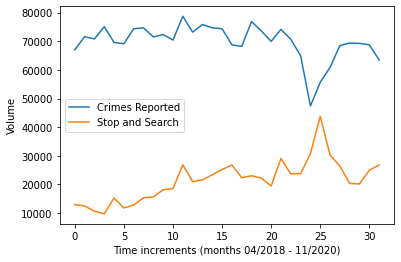

In [7]:
x = range(32)

y0 = ssTotal
y1 = cadTotal

plt.plot(x, y1, label = "Crimes Reported")
plt.plot(x, y0, label = "Stop and Search")

plt.ylabel('Volume')
plt.xlabel('Time increments (months 04/2018 - 11/2020)')

plt.legend()

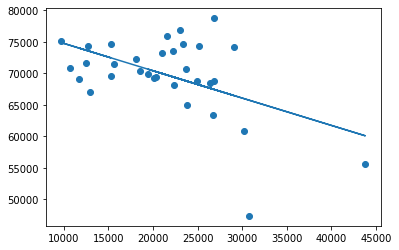

In [8]:
# CODE BORROWED F

import matplotlib.pyplot as plt
from scipy import stats

x = ssTotal
y = cadTotal

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [9]:
print(slope)

-0.43393156022311813


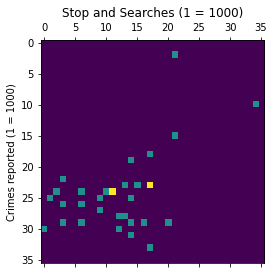

In [10]:
plt.matshow(final)
plt.title('Stop and Searches (1 = 1000)')
plt.ylabel('Crimes reported (1 = 1000)')
plt.savefig('output.png')